## Examine stops by race over time

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime as dt
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)
from scipy.stats import gaussian_kde

np.set_printoptions(precision=5, suppress=True)

%matplotlib inline

In [2]:
df = pd.read_csv('data/SQF_2003_through_2019.csv')
df.head()

,ac_assoc,ac_cgdir,ac_evasv,ac_incid,ac_inves,ac_other,ac_proxm,ac_rept,ac_stsnd,ac_time,...,typeofid,weight,xcoord,ycoord,year,zip,dayofmonth,month,weekday,ordinalday
0,N,Y,Y,N,N,N,Y,Y,N,N,...,V,155,0981738,0198272,2006,,1,January,Sunday,732312
1,N,Y,N,Y,Y,N,Y,N,N,Y,...,V,180,0981349,0198508,2006,,1,January,Sunday,732312
2,N,N,N,N,N,N,N,N,N,Y,...,V,170,0982103,0198029,2006,,2,January,Monday,732313
3,N,N,N,Y,N,N,N,N,N,N,...,P,200,0983359,0203119,2006,,1,January,Sunday,732312
4,N,N,N,N,N,N,Y,Y,N,N,...,V,135,0981681,0203430,2006,,2,January,Monday,732313


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Define a function to plot kernel density estimates:

In [3]:
def get_KDE(contin, lambda_ = 0.25):
    '''gauss kernel density estimate to check distribution of continuous variables'''
    density = gaussian_kde(contin)
    xs = np.linspace(contin.min(), contin.max(), 365)         
    density.covariance_factor = lambda : lambda_
    density._compute_covariance()
    return xs, density(xs)

In [4]:
years = range(2003, 2021)
## get ordinal for first day of each month in 2016
firstofyear = []
firstofmonth = []
for year in years:
    for month in range(1, 13):
        result = dt.strptime('{}-{}-01'.format(year, month), '%Y-%m-%d')#.date()
        if month == 1:
            firstofyear.append(result.toordinal())
        else:
            firstofmonth.append(result.toordinal())

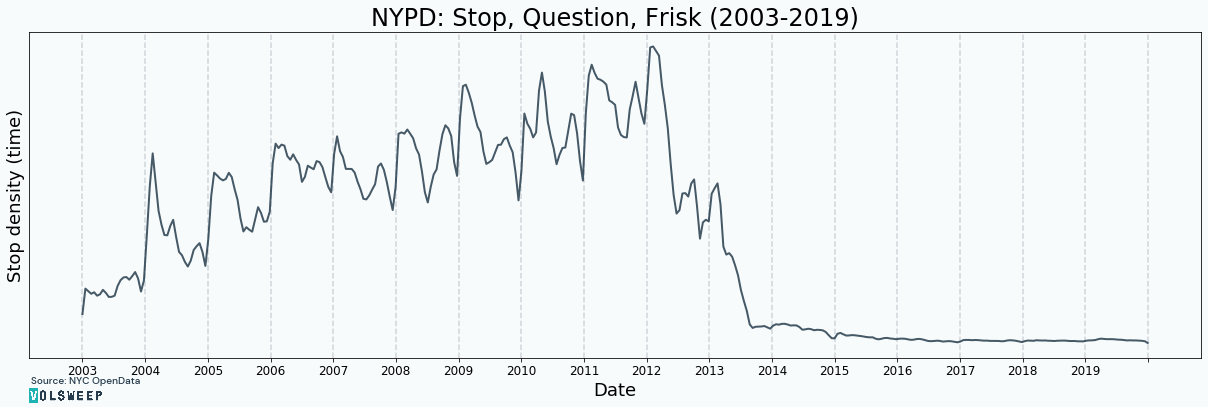

In [5]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

fig = plt.figure(figsize = (21, 6))

# face/axis colors
fig.patch.set_facecolor(vol_light)
ax = fig.add_subplot(111)
ax.patch.set_facecolor(vol_light)

vol_dark_rcparams = [
    'patch.edgecolor',
    'grid.color',
    'text.color',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color',
    'axes.edgecolor'
]

for which in vol_dark_rcparams:
    plt.rcParams[which] = vol_dark

font_dirs = ['../../../css/fonts/for_matplotlib/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DM Sans Medium'


xs, density_xs = get_KDE(
    df['ordinalday'], 
    lambda_ = 0.01,
)

plt.plot(
    xs, 
    density_xs, 
    linewidth = 2., 
    color = vol_dark,
    alpha = 0.85,
)

for which in firstofyear:
    plt.axvline(
        which, 
        ls = '--', 
        color = vol_dark, 
        alpha = 0.2,
    )

plt.title('NYPD "Stop, Question, Frisk" (2003-2019)', fontsize = 24)
plt.xticks(firstofyear, range(2003, 2020), fontsize = 12)
plt.xlabel('Date', fontsize = 18)
plt.yticks([])
plt.ylabel('Stop density (time)', fontsize = 18)

x = ax.annotate('Source: NYC OpenData', 
                xy=(0.0, 0.0), 
                xytext=(56.0, -28.0), 
                ha='center', 
                va='bottom', 
                textcoords='axes pixels', 
                xycoords='axes pixels',
               )
# logo
arr_img = plt.imread('../../../assets/VOL_Logo_Color_Light_Green.png')
imagebox = OffsetImage(arr_img, zoom=0.07)
imagebox.image.axes = ax
xy = (0.0, -45.0)
ab = AnnotationBbox(imagebox, 
                    xy,
                    xybox=(xy[0], xy[1]),
                    xycoords='axes pixels',
                    boxcoords=('axes pixels'),
                    box_alignment=(0., 0.),
                    frameon=False,
                   )
ax.add_artist(ab)
    
plt.show();

In [6]:
race_dict = {
    'B' : 'Black',
    'Q' : 'White Hispanic',
    'W' : 'White',
    'P' : 'Black Hispanic',
    'A' : 'Asian/Pacific Islander', 
    'Z' : 'Other race',
    'U' : 'Unknown race',
    'I' : 'Native American',
    'BLACK' : 'Black',
    'WHITE HISPANIC' : 'White Hispanic',
    'WHITE' : 'White',
    'BLACK HISPANIC' : 'Black Hispanic',
    'ASIAN/PAC.ISL' : 'Asian/Pacific Islander',
    'AMER IND' : 'Native American',
    'ASIAN / PACIFIC ISLANDER' : 'Asian/Pacific Islander',
    'AMERICAN INDIAN/ALASKAN NATIVE' : 'Asian/Pacific Islander',
    'AMERICAN INDIAN/ALASKAN N' : 'Asian/Pacific Islander',
    'Other race' : 'Other/Unknown race',
    'Unknown race' : 'Other/Unknown race',
}
df['race'] = [race_dict[x] if x in race_dict.keys() else x for x in df['race']]
df['race'].value_counts()

Black                     2644795
White Hispanic            1240654
White                      505201
Black Hispanic             313771
Other race                 194237
Asian/Pacific Islander     156925
Unknown race                22883
Native American             19991
X                            2137
(null)                        420
                              164
MALE                            7
Name: race, dtype: int64

In [7]:
final_races = [
    'Black',
    'White Hispanic',
    'White',
    'Black Hispanic',
    'Other race',
    'Asian/Pacific Islander',
    'Native American'
]

df['race'] = ['Other race' if x not in final_races else x for x in df['race']]

df['race'].value_counts()

Black                     2644795
White Hispanic            1240654
White                      505201
Black Hispanic             313771
Other race                 219848
Asian/Pacific Islander     156925
Native American             19991
Name: race, dtype: int64

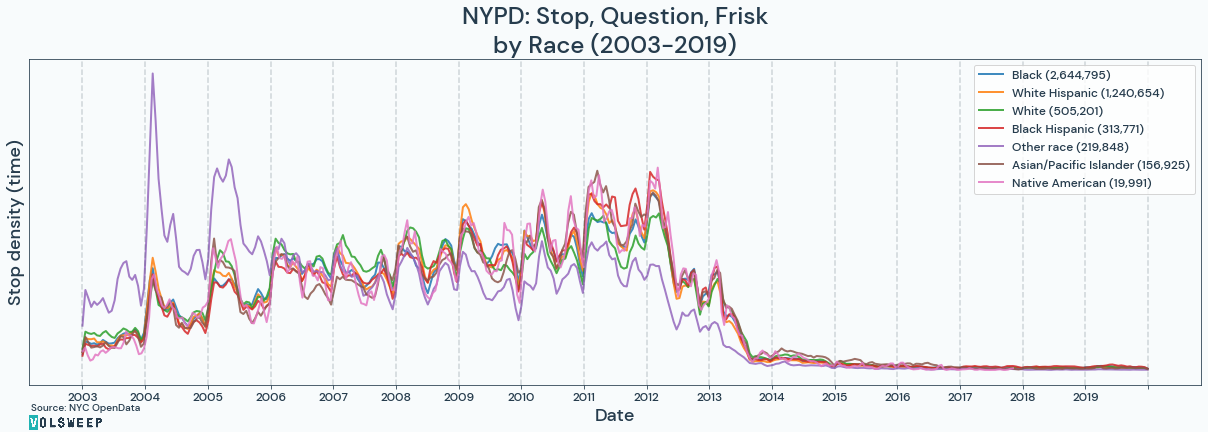

In [8]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

fig = plt.figure(figsize = (21, 6))

# face/axis colors
fig.patch.set_facecolor(vol_light)
ax = fig.add_subplot(111)
ax.patch.set_facecolor(vol_light)

vol_dark_rcparams = [
    'patch.edgecolor',
    'grid.color',
    'text.color',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color',
    'axes.edgecolor'
]

for which in vol_dark_rcparams:
    plt.rcParams[which] = vol_dark

font_dirs = ['../../css/fonts/for_matplotlib/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DM Sans Medium'

races = list(df['race'].value_counts().index)
for race in races:
    lil_df = df[df['race'] == race]

    xs, density_xs = get_KDE(
        lil_df['ordinalday'], 
        lambda_ = 0.01,
    )

    plt.plot(
        xs, 
        density_xs, 
        linewidth = 2., 
#         color = vol_dark,
        alpha = 0.85,
        label = race + ' ({:,})'.format(len(lil_df)),
    )

for which in firstofyear:
    plt.axvline(
        which, 
        ls = '--', 
        color = vol_dark, 
        alpha = 0.2,
    )

plt.title('NYPD: Stop, Question, Frisk\nby Race (2003-2019)', fontsize = 24)
plt.xticks(firstofyear, range(2003, 2020), fontsize = 12)
plt.xlabel('Date', fontsize = 18)
plt.yticks([])
plt.ylabel('Stop density (time)', fontsize = 18)
plt.legend(loc = 'upper right', fontsize = 12)
x = ax.annotate('Source: NYC OpenData', 
                xy=(0.0, 0.0), 
                xytext=(56.0, -28.0), 
                ha='center', 
                va='bottom', 
                textcoords='axes pixels', 
                xycoords='axes pixels',
               )
# logo
arr_img = plt.imread('../../../assets/VOL_Logo_Color_Light_Green.png')
imagebox = OffsetImage(arr_img, zoom=0.07)
imagebox.image.axes = ax
xy = (0.0, -45.0)
ab = AnnotationBbox(imagebox, 
                    xy,
                    xybox=(xy[0], xy[1]),
                    xycoords='axes pixels',
                    boxcoords=('axes pixels'),
                    box_alignment=(0., 0.),
                    frameon=False,
                   )
ax.add_artist(ab)
    
plt.show();

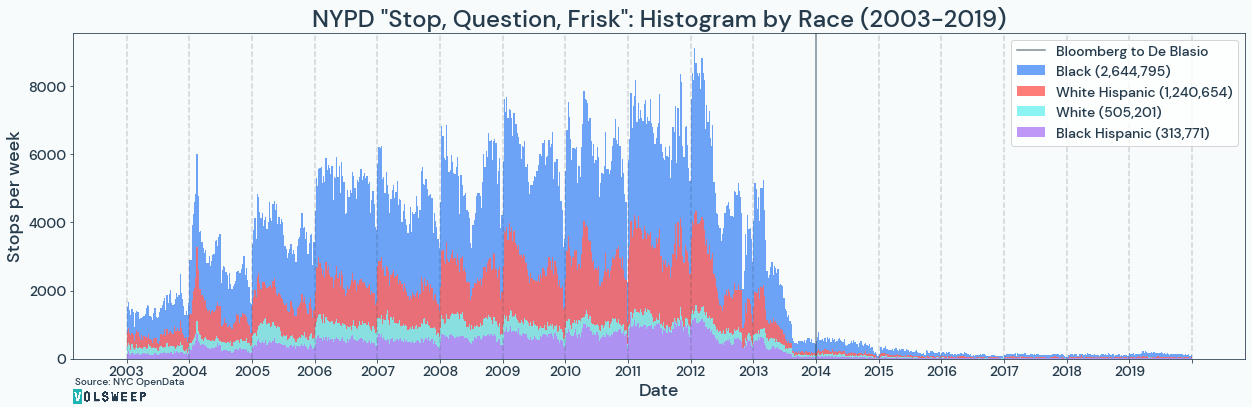

In [9]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

fig = plt.figure(figsize = (21, 6))

# face/axis colors
fig.patch.set_facecolor(vol_light)
ax = fig.add_subplot(111)
ax.patch.set_facecolor(vol_light)

vol_dark_rcparams = [
    'patch.edgecolor',
    'grid.color',
    'text.color',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color',
    'axes.edgecolor'
]

for which in vol_dark_rcparams:
    plt.rcParams[which] = vol_dark

font_dirs = ['../../css/fonts/for_matplotlib/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DM Sans Medium'

colors = [
    '#5494F7',
    '#FF6661',
    '#78F2F2',
    '#B585F5',
]

races = races[:4]

color_dict = dict(zip(races, colors))

for race in races:
    lil_df = df[df['race'] == race]
    lil_df['ordinalday'].hist(
        alpha = 0.85,
        label = race + ' ({:,})'.format(len(lil_df)),
        bins = 17*52,
        color = color_dict[race]
    )

for i in range(len(firstofyear)):
    if i != 11:
        plt.axvline(
            firstofyear[i], 
            ls = '--', 
            color = vol_dark, 
            alpha = 0.2,
        )
    
plt.axvline(
    firstofyear[11], 
    ls = '-', 
    color = vol_dark, 
    alpha = 0.6, 
    label = 'Bloomberg to De Blasio', 
)

plt.title('NYPD "Stop, Question, Frisk": Histogram by Race (2003-2019)', fontsize = 24)
plt.xticks(firstofyear, range(2003, 2020), fontsize = 14)
plt.xlabel('Date', fontsize = 18)
plt.yticks(fontsize = 14)
plt.ylabel('Stops per week', fontsize = 18)
plt.legend(loc = 'upper right', fontsize = 14)
x = ax.annotate('Source: NYC OpenData', 
                xy=(0.0, 0.0), 
                xytext=(56.0, -28.0), 
                ha='center', 
                va='bottom', 
                textcoords='axes pixels', 
                xycoords='axes pixels',
               )
# logo
arr_img = plt.imread('../../../assets/VOL_Logo_Color_Light_Green.png')
imagebox = OffsetImage(arr_img, zoom=0.07)
imagebox.image.axes = ax
xy = (0.0, -45.0)
ab = AnnotationBbox(imagebox, 
                    xy,
                    xybox=(xy[0], xy[1]),
                    xycoords='axes pixels',
                    boxcoords=('axes pixels'),
                    box_alignment=(0., 0.),
                    frameon=False,
                   )
ax.add_artist(ab)

plt.grid(False)
plt.show();